In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = "https://jobs.github.com/positions.json"

In [3]:
response = requests.get(url)
data = response.json()

function to get the number of jobs for the given technology

In [4]:
def get_number_of_jobs(technology):
    
    number_of_jobs = 0
    
    i=1
    url = 'https://jobs.github.com/positions.json?description={}&page={}'.format(technology, i)
    response = requests.get(url)
    data = response.json()
    
    if len(data) < 50:
        number_of_jobs = len(data)
    else:
        while len(data) == 50:
            number_of_jobs = number_of_jobs + len(data)
            i = i+1
            url = 'https://jobs.github.com/positions.json?description={}&page={}'.format(technology, i)
            response = requests.get(url)
            data = response.json()
            
        number_of_jobs = number_of_jobs + len(data)
    
    return technology,number_of_jobs

In [5]:
print(get_number_of_jobs('python'))

('python', 64)


Creating a python list of technologies for which the number of jobs postings is to be found

In [6]:
technologies = ['Python', 'Java', 'R', 'JavaScript', 'Swift', 'C++', 'PHP', 'SQL', 'Go']

In [7]:
Language = []
no_of_jobs = []

for technology in technologies:
    tech, jobs = get_number_of_jobs(technology)
    Language.append(tech)
    no_of_jobs.append(jobs)

extracting the data from the below web site

In [8]:
baseurl = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

In [9]:
second_data = requests.get(baseurl).text

In [10]:
soup = BeautifulSoup(second_data,"html5lib")

Scrape the Language name, annual average salary and Learning Difficulty

In [11]:
table = soup.find('table')

Average_Annual_Salary = []
Learning_Difficulty = []

for row in table.find_all('tr'):
    cols = row.find_all('td')
    Average_Annual_Salary.append(cols[3].getText())
    Learning_Difficulty.append(cols[4].getText())

In [12]:
Learning_Difficulty.pop(0)
Average_Annual_Salary.pop(0)
print(Learning_Difficulty.pop(6))
print(Average_Annual_Salary.pop(6))

Hard
$88,726


In [13]:
df = pd.DataFrame()

In [14]:
df['Language'] = Language
df['Number Of Jobs'] = no_of_jobs
df['Average Annual Salary ($)'] = Average_Annual_Salary
df['Learning Difficulty'] = Learning_Difficulty
df

,Language,Number Of Jobs,Average Annual Salary ($),Learning Difficulty
0,Python,64,"$114,383",Easy
1,Java,96,"$101,013",Easy
2,R,200,"$92,037",Hard
3,JavaScript,69,"$110,981",Easy
4,Swift,2,"$130,801",Easy
5,C++,200,"$113,865",Hard
6,PHP,35,"$84,727",Easy
7,SQL,74,"$84,793",Easy
8,Go,154,"$94,082",Difficult


In [15]:
df['Average Annual Salary ($)'] = df['Average Annual Salary ($)'].str.slice(1)
df

,Language,Number Of Jobs,Average Annual Salary ($),Learning Difficulty
0,Python,64,"114,383",Easy
1,Java,96,"101,013",Easy
2,R,200,"92,037",Hard
3,JavaScript,69,"110,981",Easy
4,Swift,2,"130,801",Easy
5,C++,200,"113,865",Hard
6,PHP,35,"84,727",Easy
7,SQL,74,"84,793",Easy
8,Go,154,"94,082",Difficult


In [16]:
df['Number Of Jobs'] = df['Number Of Jobs'].astype(int)

In [17]:
df

,Language,Number Of Jobs,Average Annual Salary ($),Learning Difficulty
0,Python,64,"114,383",Easy
1,Java,96,"101,013",Easy
2,R,200,"92,037",Hard
3,JavaScript,69,"110,981",Easy
4,Swift,2,"130,801",Easy
5,C++,200,"113,865",Hard
6,PHP,35,"84,727",Easy
7,SQL,74,"84,793",Easy
8,Go,154,"94,082",Difficult


In [18]:
df_sorted = df.sort_values('Number Of Jobs')
df_sorted

,Language,Number Of Jobs,Average Annual Salary ($),Learning Difficulty
4,Swift,2,"130,801",Easy
6,PHP,35,"84,727",Easy
0,Python,64,"114,383",Easy
3,JavaScript,69,"110,981",Easy
7,SQL,74,"84,793",Easy
1,Java,96,"101,013",Easy
8,Go,154,"94,082",Difficult
2,R,200,"92,037",Hard
5,C++,200,"113,865",Hard


In [19]:
df_sorted.reset_index(drop = True, inplace = True)
df_sorted.index

RangeIndex(start=0, stop=9, step=1)

In [20]:
df_sorted

,Language,Number Of Jobs,Average Annual Salary ($),Learning Difficulty
0,Swift,2,"130,801",Easy
1,PHP,35,"84,727",Easy
2,Python,64,"114,383",Easy
3,JavaScript,69,"110,981",Easy
4,SQL,74,"84,793",Easy
5,Java,96,"101,013",Easy
6,Go,154,"94,082",Difficult
7,R,200,"92,037",Hard
8,C++,200,"113,865",Hard


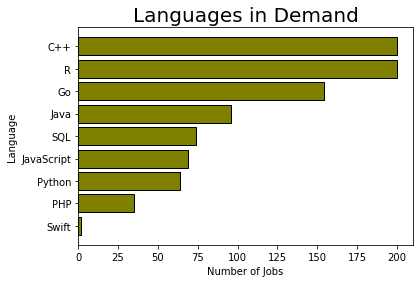

In [21]:
plt.barh('Language', 'Number Of Jobs', data = df_sorted, color='olive', edgecolor='black')
plt.title('Languages in Demand', fontsize=20)
plt.xlabel('Number of Jobs')
plt.ylabel('Language')
plt.show()

In [22]:
a = df[df['Learning Difficulty'] == 'Easy']
b = df[df['Learning Difficulty'] == 'Hard']
c = df[df['Learning Difficulty'] == 'Difficult']

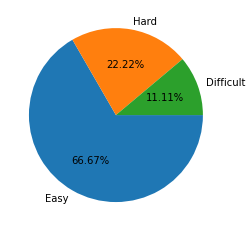

In [23]:
list = [len(a), len(b), len(c)]
labels = ['Easy', 'Hard', 'Difficult']
plt.pie(list, labels=labels, autopct='%.2f%%', counterclock=False)
plt.show()

In [24]:
import seaborn as sns

In [25]:
df_sorted['Average Annual Salary ($)'] = df_sorted['Average Annual Salary ($)'].str.replace(',', '').astype(int)
df_sorted

,Language,Number Of Jobs,Average Annual Salary ($),Learning Difficulty
0,Swift,2,130801,Easy
1,PHP,35,84727,Easy
2,Python,64,114383,Easy
3,JavaScript,69,110981,Easy
4,SQL,74,84793,Easy
5,Java,96,101013,Easy
6,Go,154,94082,Difficult
7,R,200,92037,Hard
8,C++,200,113865,Hard


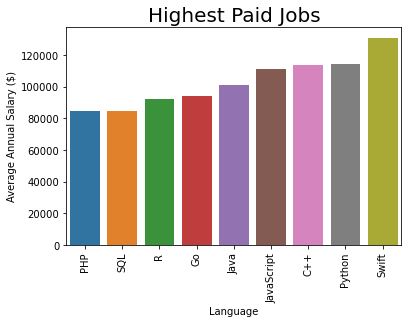

In [26]:
sns.barplot(x='Language', y="Average Annual Salary ($)", data=df_sorted, order=df_sorted.sort_values('Average Annual Salary ($)').Language)
plt.title('Highest Paid Jobs', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

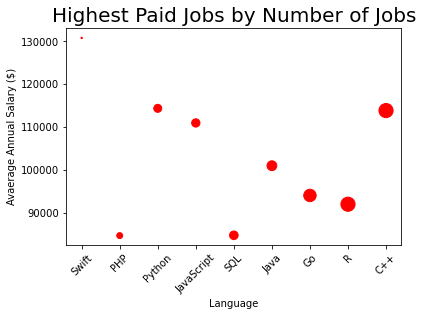

In [27]:
plt.scatter(y='Average Annual Salary ($)', x='Language', s='Number Of Jobs', data=df_sorted, color='r')
plt.title('Highest Paid Jobs by Number of Jobs', fontsize=20)
plt.xlabel('Language')
plt.ylabel('Avaerage Annual Salary ($)')
plt.xticks(rotation=45)
plt.show()

In [47]:
a = df_sorted['Language']
b = df_sorted['Number Of Jobs']
c = df_sorted['Average Annual Salary ($)']
d = df_sorted['Learning Difficulty']

In [48]:
from openpyxl import Workbook

In [49]:
wb=Workbook()                   
ws=wb.active  

In [50]:
ws.append(['Language','Number Of Jobs', 'Average Annual Salary ($)', 'Learning Difficulty'])

for i in range(len(a)):
    ws.append([a[i], b[i], c[i], d[i]])

In [51]:
wb.save("Analysis Of Programming Languages.xlsx")